In [1]:
import sys
import pandas as pd

sys.path.append('..')

import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split

# DEID libraries
from gojo import core
from gojo import deepl
from gojo import util
from gojo import plotting

In [2]:
# load test dataset (Wine)
wine_dt = datasets.load_wine()

# create the target variable. Classification problem 0 vs rest
# to see the target names you can use wine_dt['target_names']
y = (wine_dt['target'] == 1).astype(int)  
X = wine_dt['data']

# standarize input data
std_X = util.zscoresScaling(X)

# split Xs and Ys in training and validation
X_train, X_valid, y_train, y_valid = train_test_split(
    std_X, y, train_size=0.8, random_state=1997, shuffle=True,
    stratify=y
)
X_train.shape, X_valid.shape, '%.3f' % y_train.mean(),  '%.3f' % y_valid.mean()

((142, 13), (36, 13), '0.401', '0.389')

In [7]:
model = core.TorchSKInterface(
    model=deepl.ffn.createSimpleFFNModel(
        in_feats=X_train.shape[1],
        out_feats=1,
        layer_dims=[20],
        layer_activation=torch.nn.ELU(),
        output_activation=torch.nn.Sigmoid()),
    iter_fn=deepl.iterSupervisedEpoch,
    loss_function=torch.nn.BCELoss(),
    n_epochs=50,
    train_split=0.8,
    train_split_stratify=True,
    optimizer_class=torch.optim.Adam,
    dataset_class=deepl.loading.TorchDataset,
    dataloader_class=torch.utils.data.DataLoader,
    optimizer_kw=dict(
        lr=0.001
    ),
    train_dataset_kw=None,
    valid_dataset_kw=None,
    train_dataloader_kw=dict(
        batch_size=16,
        shuffle=True
    ),
    valid_dataloader_kw=dict(
        batch_size=X_train.shape[0]
    ),
    iter_fn_kw= None,
    callbacks= None,
    seed=1997,
    device='mps',
    metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5),
    verbose=1
    
)

In [8]:
model.train(X_train, y_train)

Training model...: 100%|████████████████████████████████████████████| 50/50 [00:03<00:00, 12.53it/s]


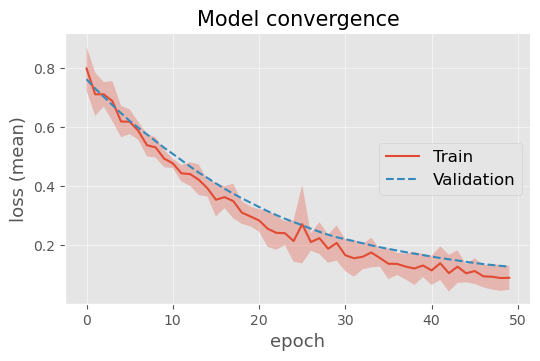

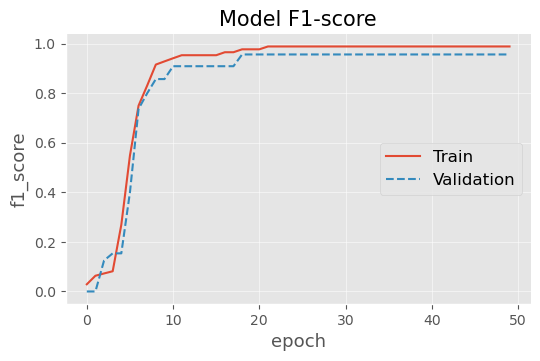

In [9]:
model_history = model.fitting_history

# display model convergence
plotting.linePlot(
    model_history['train'], model_history['valid'],
    x='epoch', y='loss (mean)', err='loss (std)',
    legend_labels=['Train', 'Validation'],
    title='Model convergence',
    ls=['solid', 'dashed'],
    legend_pos='center right')

# display model performance
plotting.linePlot(
    model_history['train'], model_history['valid'],
    x='epoch', y='f1_score', 
    legend_labels=['Train', 'Validation'],
    title='Model F1-score',
    ls=['solid', 'dashed'],
    legend_pos='center right')

In [10]:
y_hat = model.performInference(X_valid)

In [11]:
((y_hat > 0.5) == (y_valid > 0.5)).mean()

0.9722222222222222

In [16]:
pd.DataFrame([core.getScores(y_true=y_valid, y_pred=y_hat, 
               metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5))]).T.round(decimals=3)

,0
accuracy,0.972
balanced_accuracy,0.977
precision,0.933
recall,1.000
sensitivity,1.000
specificity,0.955
negative_predictive_value,1.000
f1_score,0.966
auc,0.977


In [17]:
# reset the model and perform the predictions
model.resetFit()
y_hat = model.performInference(X_valid)
core.getScores(y_true=y_valid, y_pred=y_hat, 
               metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5))

{'accuracy': 0.3888888888888889,
 'balanced_accuracy': 0.3181818181818182,
 'precision': 0.0,
 'recall': 0.0,
 'sensitivity': 0.0,
 'specificity': 0.6363636363636364,
 'negative_predictive_value': 0.5,
 'f1_score': 0.0,
 'auc': 0.3181818181818182}

In [18]:
model.train(X_train, y_train)
y_hat = model.performInference(X_valid)
core.getScores(y_true=y_valid, y_pred=y_hat, 
               metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5))

Training model...: 100%|████████████████████████████████████████████| 50/50 [00:03<00:00, 12.99it/s]


{'accuracy': 0.9722222222222222,
 'balanced_accuracy': 0.9772727272727273,
 'precision': 0.9333333333333333,
 'recall': 1.0,
 'sensitivity': 1.0,
 'specificity': 0.9545454545454546,
 'negative_predictive_value': 1.0,
 'f1_score': 0.9655172413793104,
 'auc': 0.9772727272727273}

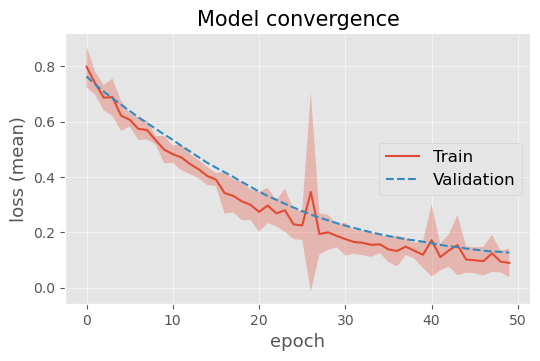

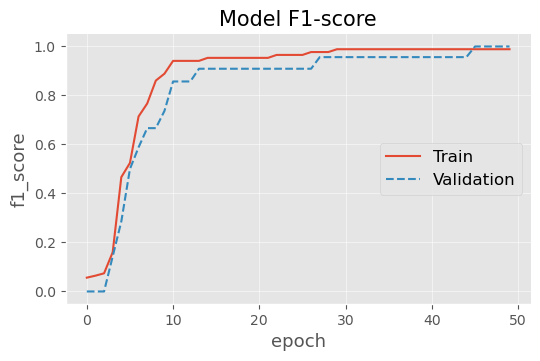

In [19]:
model_history = model.fitting_history

# display model convergence
plotting.linePlot(
    model_history['train'], model_history['valid'],
    x='epoch', y='loss (mean)', err='loss (std)',
    legend_labels=['Train', 'Validation'],
    title='Model convergence',
    ls=['solid', 'dashed'],
    legend_pos='center right')

# display model performance
plotting.linePlot(
    model_history['train'], model_history['valid'],
    x='epoch', y='f1_score', 
    legend_labels=['Train', 'Validation'],
    title='Model F1-score',
    ls=['solid', 'dashed'],
    legend_pos='center right')

In [20]:
# reset the model and perform the predictions
model.resetFit()
y_hat = model.performInference(X_valid)
core.getScores(y_true=y_valid, y_pred=y_hat, 
               metrics=core.getDefaultMetrics('binary_classification', bin_threshold=0.5))

{'accuracy': 0.3888888888888889,
 'balanced_accuracy': 0.3181818181818182,
 'precision': 0.0,
 'recall': 0.0,
 'sensitivity': 0.0,
 'specificity': 0.6363636363636364,
 'negative_predictive_value': 0.5,
 'f1_score': 0.0,
 'auc': 0.3181818181818182}

In [ ]:
import torch

In [ ]:
isinstance(torch.nn.BCELoss(), torch.nn.Module)

In [ ]:
sig = torch.nn.Sigmoid()


In [ ]:
sig.__call__

In [ ]:
[1, 2, 3, 4][2:]

In [ ]:
import sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sys.path.append('..')

# GOJO libraries
from gojo import deepl

In [ ]:
def plot(_n_layers, _layers):
    plt.subplots(figsize=(6, 3))
    for i, _layer in enumerate(_layers):
        plt.plot(list(range(1, _n_layers+1)), _layer, label='%d' % i)
        plt.scatter(list(range(1, _n_layers+1)), _layer)
    plt.legend()
    plt.show()

In [ ]:
layers1 = deepl.ffn.generateParametrizedLayers(
    10,
    1000,
    'linear',
    1, 9999,
    beta=2,
    alpha=100
    
)

In [ ]:
layers2 = deepl.ffn.generateParametrizedLayers(
    10,
    1000,
    'exponential',
    1, 9999,
    beta=1.5,
    alpha=100
    
)

In [ ]:
plot(10, [layers1, layers2])

In [ ]:
assert False

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
def plot(_n_layers, _layers):
    plt.subplots(figsize=(6, 3))
    for i, _layer in enumerate(_layers):
        plt.plot(list(range(1, _n_layers+1)), _layer, label='%d' % i)
        plt.scatter(list(range(1, _n_layers+1)), _layer)
    plt.legend()
    plt.show()


In [ ]:
n_layers = 6
init = 1000
x = init
layers = [x]
for i in range(1, n_layers):
    x = np.sqrt(x)
    layers.append(x)
layers

plot(n_layers, [layers])

In [ ]:
# función parametrizada con un array
layers2 = np.ceil(np.array([init] * n_layers) * (1/2) ** np.arange(n_layers))
layers2

In [ ]:
init_layer_shape = 1000
n_layers = 5
beta = 2

In [ ]:
np.ceil(
    np.array([init_layer_shape] * n_layers) * ( (1/beta) ** np.arange(n_layers) ))

In [ ]:
alpha = 200
layers = np.ceil(
    np.array([init_layer_shape] * n_layers) - ( alpha * np.arange(n_layers)))
layers

In [ ]:
layers[layers < 500] = 500
layers

In [ ]:
plot(n_layers, [layers, layers2])

In [ ]:
layers3 = np.ceil(np.array([init] * n_layers) * (1/np.e) ** np.arange(n_layers))

In [ ]:
plot(n_layers, [layers, layers2, layers3])

In [ ]:
layers4 = np.ceil(np.array([init] * n_layers) * (1/2) ** np.arange(n_layers))

In [ ]:
plot(n_layers, [layers, layers2, layers3, layers4])